### NLP Sentiment Analysis Project
**Overview**

This NLP Sentiment Analysis project aims to analyze the sentiment of Twitter data and classify it as positive or negative. The project utilizes natural language processing techniques to extract insights from textual data.

**Project Description**
The project involves the following steps:

1. Data Collection: Gathered a dataset of tweets containing various sentiments from: "https://www.kaggle.com/datasets/kazanova/sentiment140"
2. Data Preprocessing: Cleaned and preprocessed the text data by removing special characters, stopwords, and performing tokenization. The text was converted to lowercase and stemmed using the NLTK library.

3. Feature Extraction: Utilized the Bag-of-Words (BoW) technique to represent the text data as numerical features. Applied TF-IDF transformation to assign weights to words based on their frequency and rarity across the dataset.

4. Model Training: Trained a Naive Bayes classifier and Random forest on the preprocessed data to classify tweets into positive or negative sentiment. The scikit-learn library was used for model training.

5. Model Evaluation: Split the dataset into training and testing subsets. Evaluated the performance of the trained model using metrics such as accuracy, precision, recall, and F1-score.

5. Results and Visualization: Visualized the results by creating a confusion matrix heatmap to showcase the model's performance. Additional visualizations, such as word clouds, were generated to explore the most frequent words associated with positive and negative sentiments.

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import re #used as a regular expression to find particular patterns and process it
import string #used to obtain information in the string and manipulate the string overall
import warnings
from wordcloud import WordCloud
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# nltk
import nltk #a natural language processing toolkit module associated in anaconda
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
warnings.filterwarnings('ignore')
nltk.download('stopwords')

#warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mekna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mekna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load the dataset

In [2]:
#pd.set_option('display.max_colwidth', None)
DATASET_COLUMNS=['target','ids','date','flag','user','text']
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', names=DATASET_COLUMNS)

## Explore and preprocess the data

In [3]:
df.sample(6)

,target,ids,date,flag,user,text
1143263,4,1977409400,Sat May 30 20:55:27 PDT 2009,NO_QUERY,K_Marie101,Watching CSI with Alana
1446163,4,2062471094,Sat Jun 06 23:19:41 PDT 2009,NO_QUERY,VioletMonroe,I finally opened my champagne and its almost g...
557657,0,2204568591,Wed Jun 17 02:33:31 PDT 2009,NO_QUERY,chinhcom,"vá»«a má»i dáº­y, tháº¥y hÆ¡i má»t, lo cho s..."
1271201,4,2000518493,Mon Jun 01 22:17:54 PDT 2009,NO_QUERY,lheybella,@itsjustdi http://twitpic.com/6g784 - ang saya...
1148786,4,1978250831,Sat May 30 22:49:51 PDT 2009,NO_QUERY,Kay2seksi,@YaGrlDimplez Yes he is Very
1389922,4,2053174162,Sat Jun 06 03:33:54 PDT 2009,NO_QUERY,rampantheart,@preethzzz Wow! That's cool!


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
df.nunique()

target          2
ids       1598315
date       774363
flag            1
user       659775
text      1581466
dtype: int64

In [6]:
df = df[["target","text"]]
df.sample(5)

,target,text
770,0,@RubyRose1 awww wish i could go! but its in sy...
566121,0,my back hurts so much
649894,0,I couldn't sleep o well @ least we r getting ...
51030,0,Looks like this season's first ducklings won't...
50972,0,Omg I REALLY need to go shopping soon actuall...


In [7]:
df.target.unique()

array([0, 4], dtype=int64)

In [8]:
df.target = df['target'].replace(4,1)

In [9]:
df.target.unique()

array([0, 1], dtype=int64)

In [10]:
df.sample(5)

,target,text
983248,1,@rickyelqasem Better converting the wife then ...
94440,0,i just sex'd all your moms and i got sick
463200,0,My dad forgot to unlock my phone... Again. Dam...
966012,1,learned swing swing by aar on the guitar. anot...
1572400,1,"michaels, jamba juice, panda express, bao's ho..."


In [11]:
df.shape

(1600000, 2)

In [12]:
df['target'].value_counts()

0    800000
1    800000
Name: target, dtype: int64

Negative    800000
Positive    800000
Name: target, dtype: int64


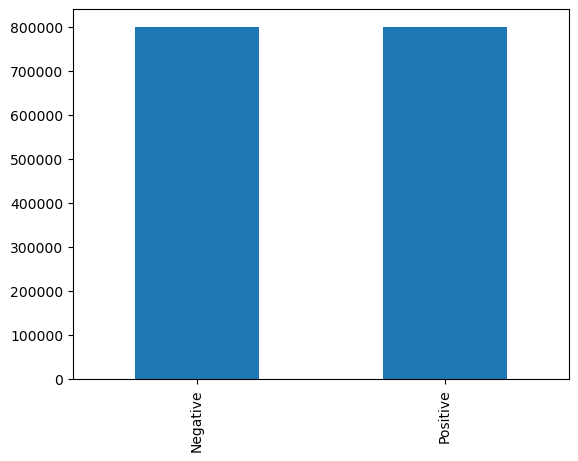

In [13]:
# Visualising the distribution of the target variable

sentiment= {0:'Negative', 1:'Positive'}
print(df['target'].apply(lambda x: sentiment[x]).value_counts())
df['target'].apply(lambda x: sentiment[x]).value_counts().plot(kind='bar')
plt.show()

In [14]:
data =  df[["text", 'target']]
data.head(2)

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0


<Axes: >

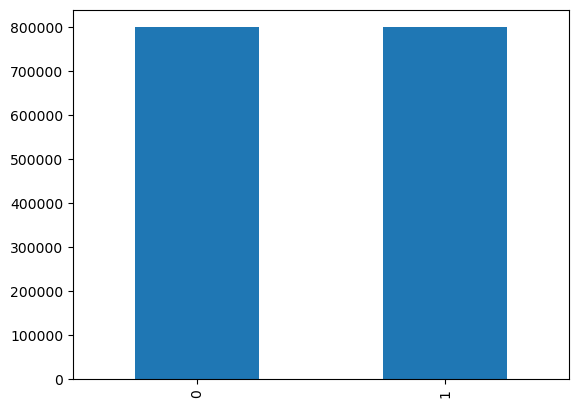

In [15]:
df['target'].value_counts().plot(kind='bar')

## Subset the data

In [16]:
# can use entire dataset for this Analysis or select a subset of 1.6 Million tweets. 
# In this using 50k entires. 
# in the process of sampling maintaining the correct target ratio is very imp.

data_pos = data[data['target']==1].sample(50000, random_state=42)
data_neg = data[data['target']==0].sample(50000, random_state=42)

dataset = pd.concat([data_pos, data_neg])
print(len(dataset))
dataset.sample(3)

100000


,text,target
173068,Dang I just dropped some of my subway on da fl...,0
512003,@kevinfelixchan: My dad rented the penthouses/...,0
915062,Happy Mothers Day to all you mothers out there...,1


## Text cleaning and preprocessing

### Converting the text to lowercase

In [17]:
# Converting to a Lower case

dataset["text"]= dataset['text'].str.lower()
dataset.text.sample(4)

1533201    @gulpanag soha is so cute. i like her so much....
505947     @lipserviceradio  flowers usually do last long...
511331     is sad. knew it would eventually hit her. wish...
484835     just walked into the grocery store. not ready ...
Name: text, dtype: object

### Removing stopwords

In [18]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']
len(stopwordlist)

136

In [19]:
# removing stopwords

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset["text"].apply(lambda text: cleaning_stopwords(text))
dataset.text.tail()

299543     @jendearness @bjwysoske not forwarded. think it.
746432                                  @sonicphotonic yeah
256034    i'm sooo burnt remind take suncream next time ...
428114    @ronskanky applied weeks ago but didn't hear a...
491974    phone killing itself, ipod, gorgeous smashed s...
Name: text, dtype: object

In [20]:
# Removing stopwords using nltk lib

# Tokenization of text 
tokenizer = ToktokTokenizer()

#Setting English stopwords
stopword_list = nltk.corpus.stopwords.words('english')
# Removing standard english stopwords like prepositions, advers..
stop = set(stopwords.words('english'))
print('NLTK stop word lists \n')
print(stop)

# Removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens if token not in  stopword_list]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
        
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
    

NLTK stop word lists 

{'ve', 'until', "needn't", 'off', 's', 't', 'through', 'under', "hasn't", 'had', 'didn', "wouldn't", 'weren', 'few', 'hers', "you've", "haven't", 'some', 'such', 'you', "you're", 'or', 'very', 'from', 'be', 'yours', 'same', 'here', 'now', 'd', 'wasn', 'their', 'itself', 'below', 'ain', 'who', 'll', 'then', 'theirs', 'all', 'what', "that'll", 'couldn', "weren't", 'against', 'myself', 'of', 'further', 'while', 'we', 'so', 'doing', 'm', 'because', 'having', 'where', 'themselves', 'nor', 'own', 'they', "mustn't", "should've", 'how', 'he', 'been', 'mightn', 'more', 'herself', "shan't", 'are', 're', 'was', 'into', 'am', 'it', 'when', 'has', 'with', 'too', 'out', 'in', "hadn't", 'only', 'a', 'during', 'up', 'for', "don't", 'other', 'by', "isn't", 'each', 'me', 'once', 'between', 'than', 'wouldn', 'again', "you'd", 'is', 'o', 'shouldn', 'my', 'your', 'this', 'them', 'hasn', 'needn', 'any', 'whom', 'not', 'to', 'over', 'that', 'after', 'just', "couldn't", 'an', 'about', "

In [21]:
dataset['text'] = dataset['text'].apply(remove_stopwords)
data.text.tail()

1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, dtype: object

### Removing unnecessary characters or symbols

In [22]:
# Removing URls

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x:  cleaning_URLs(x))
dataset['text'].head(5)

1012188    lookin 4ward long weekend really dont want go ...
1099036              #myweakness music live meet people make
1275978                            figured internet new ipod
1388988    @hillsongunited ' wait worship guys tonight. '...
938859     @sillybeggar congrats james ! ! ' sure book go...
Name: text, dtype: object

In [23]:
# Removing numbers

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x : cleaning_numbers(x))
dataset['text'].head(5)

1012188    lookin ward long weekend really dont want go w...
1099036              #myweakness music live meet people make
1275978                            figured internet new ipod
1388988    @hillsongunited ' wait worship guys tonight. '...
938859     @sillybeggar congrats james ! ! ' sure book go...
Name: text, dtype: object

In [24]:
# function to remove pattern in the input text

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, '', input_txt)
    return input_txt


In [25]:
# Removing twitter handels (@user) 

dataset["text"] = np.vectorize(remove_pattern)(dataset['text'], "@[\w]*")
dataset['text'].head()

1012188    lookin ward long weekend really dont want go w...
1099036              #myweakness music live meet people make
1275978                            figured internet new ipod
1388988              ' wait worship guys tonight. ' much fun
938859      congrats james ! ! ' sure book going huge suc...
Name: text, dtype: object

In [26]:
# remove Special ccharacters, numbers and punctuation

dataset["text"] = dataset['text'].str.replace("[^a-zA-Z#]", " ")
dataset.head(5)

,text,target
1012188,lookin ward long weekend really dont want go w...,1
1099036,#myweakness music live meet people make,1
1275978,figured internet new ipod,1
1388988,wait worship guys tonight much fun,1
938859,congrats james sure book going huge suc...,1


### Remove short words

In [27]:
# remove short words

dataset['text'] = dataset['text'].apply(lambda x: 
                    " ".join([w for w in x.split() if len(w)>3]))
dataset.head()

,text,target
1012188,lookin ward long weekend really dont want work,1
1099036,#myweakness music live meet people make,1
1275978,figured internet ipod,1
1388988,wait worship guys tonight much,1
938859,congrats james sure book going huge success,1


### Tokenizing the text

In [28]:
# Tokenizing the text
tokenizer = RegexpTokenizer(r'\w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset.head()


,text,target
1012188,"[lookin, ward, long, weekend, really, dont, wa...",1
1099036,"[myweakness, music, live, meet, people, make]",1
1275978,"[figured, internet, ipod]",1
1388988,"[wait, worship, guys, tonight, much]",1
938859,"[congrats, james, sure, book, going, huge, suc...",1


### Applying stemming or lemmatization

In [29]:
# Applying stemming

st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

1012188    [lookin, ward, long, weekend, really, dont, wa...
1099036        [myweakness, music, live, meet, people, make]
1275978                            [figured, internet, ipod]
1388988                 [wait, worship, guys, tonight, much]
938859     [congrats, james, sure, book, going, huge, suc...
Name: text, dtype: object

In [30]:
# Applying lemmatization

nltk.download('wordnet')
nltk.download('omw-1.4')
lm = nltk.WordNetLemmatizer()
def lemmatize_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return ' '.join(text)
dataset['text'] = dataset['text'].apply(lambda x: lemmatize_on_text(x))
dataset['text'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mekna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mekna\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


1012188    lookin ward long weekend really dont want work
1099036            myweakness music live meet people make
1275978                             figured internet ipod
1388988                     wait worship guy tonight much
938859        congrats james sure book going huge success
Name: text, dtype: object

## Data visualization 
Word Cloud: Create a word cloud visualization to gain insights into the most frequent words in your NLP data.

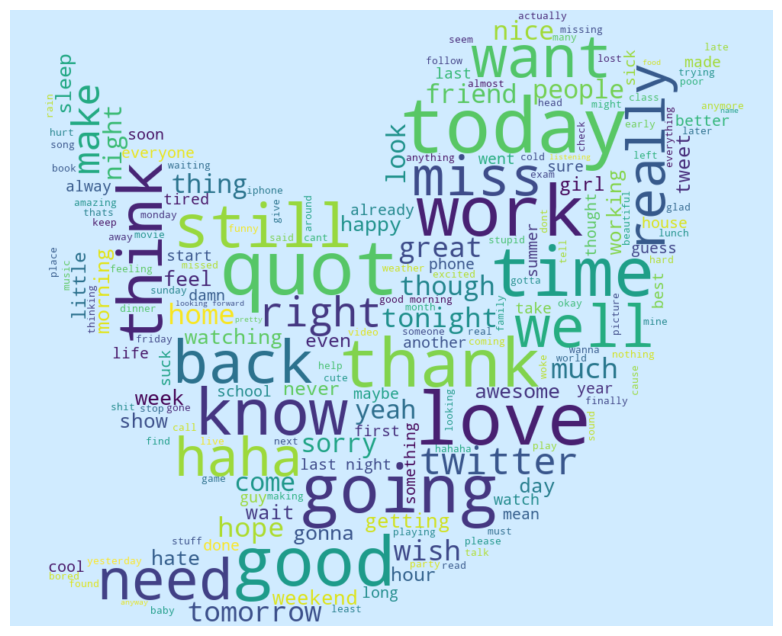

In [49]:
# Visualize the frequent words 

from PIL import Image
#from os import path
all_words = " ".join([sentence for  sentence in dataset['text']])

bird_mask = np.array(Image.open("twitter_mask.png"))

wordcould = WordCloud(width=800, height=500, mask=bird_mask
                      ,background_color="#d0ebff",
                      random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcould, interpolation='bilinear')
plt.axis('off')
plt.show()

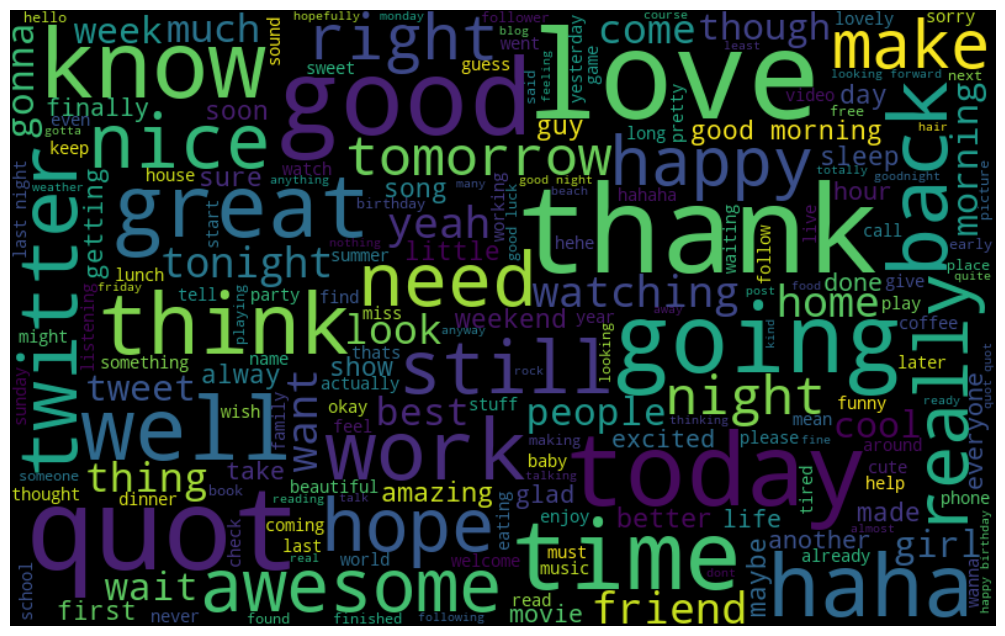

In [32]:
# frequent words visualisation for +ve !!
all_words = " ".join([sentence for sentence in 
                      dataset['text'][dataset['target']==1] ])

wordcloud = WordCloud(width=800, height=500, random_state=42,
                     max_font_size=100).generate(all_words)

# Plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

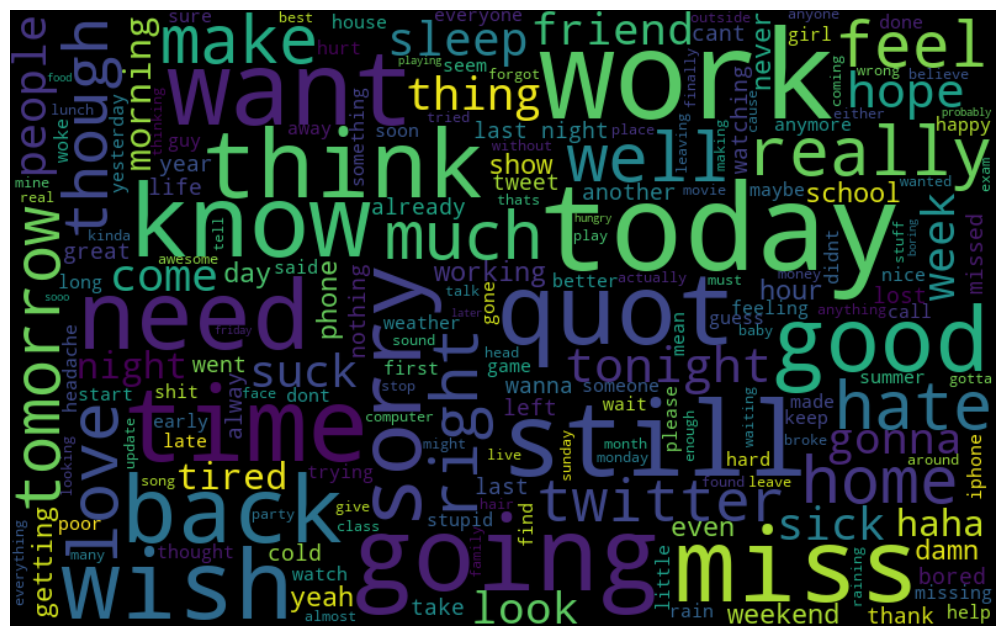

In [33]:
# frequent words visualization for -ve

all_words = " ".join([sentence for sentence in dataset['text'][dataset['target']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Splitting the dataset

In [34]:
# input Feature and label

X = dataset.text
y = dataset.target
y.value_counts()

1    50000
0    50000
Name: target, dtype: int64

In [35]:
# Spliting our data into Train and test
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42)

## Feature extraction

In [36]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.9, min_df=0.02, 
                        max_features=1000, stop_words='english')

tfidf.fit(list(X_train) + list(X_test))
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [37]:
# Count Vector approach (Bag of words approach)
# PS: We are not building any models using this approach as we are doing with Tf-IDF.

from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(max_df=0.90, min_df=2, max_features=1000,
                           stop_words='english')
count_vec.fit(list(X_train) + list(X_test))
X_train_count_vec = count_vec.transform(X_train)
X_test_count_vec = count_vec.transform(X_test)

## Model training and evaluation

### Naive Bayes

In [40]:
scores_dict_tfid = {}

# Naive bayes using tf-idf features
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
print(f'naive bayes TfIdf accuracy {accuracy_score(y_pred_nb, y_test)*100}%')
scores_dict_tfid['Naive Bayes(Tfid)'] = accuracy_score(y_pred_nb, y_test)

naive bayes TfIdf accuracy 55.835%


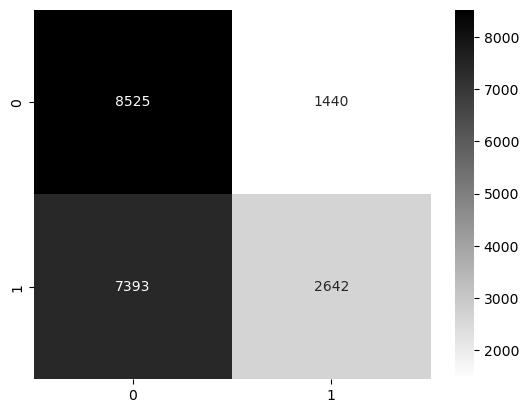

In [41]:
cf_matrix_model = confusion_matrix(y_test, y_pred_nb)

sns.heatmap(cf_matrix_model, annot=True, fmt='', cmap='binary');

### Random Forests

In [42]:
# Random Forest using Tfidf features

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)
print(f'Random Forest TfIdf accuracy {accuracy_score(y_pred_rf, y_test)}%')
scores_dict_tfid["Random Forest TfIdf"] = accuracy_score(y_pred_rf, y_test)

Random Forest TfIdf accuracy 0.5686%


<Axes: >

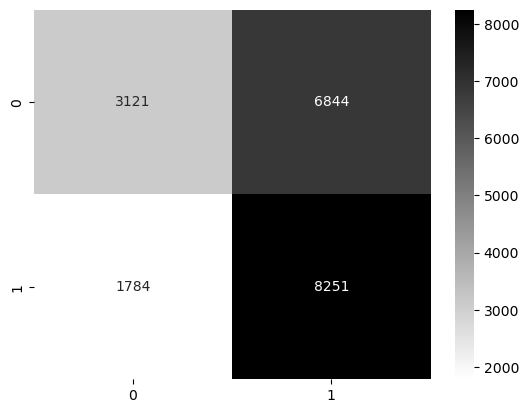

In [43]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='', cmap='binary')


In [44]:
scores_dict_tfid

{'Naive Bayes(Tfid)': 0.55835, 'Random Forest TfIdf': 0.5686}

## Iteration and improvement

In [45]:
# Random forest seems working well but to get better results we need to try with complete data and further analysis 


Thank you
.End 